# Project: Instacart Basket Analysis
## Author: Cassy Stunkel
## Answering Key Questions from Project Brief
## Table of Contents

01. Import libraries and data sets

02. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

03. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

04. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

05. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

06. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. I have chosen to answer the following questions:

* Are there differences in ordering habits based on a customer’s loyalty status?
* Are there differences in ordering habits based on a customer’s region?
* Are there differences in ordering habits based on a customer's family status?
* Are there differences in ordering habits based on a customer's age?
* Is there a connection between age and spending power?

## 01. Import libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'/Users/cassystunkel/Documents/Instacart Basket Analysis'

In [3]:
# Import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'no_low_activity.pkl'))

In [4]:
# View data
df.dtypes

product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
first_order                  bool
add_to_cart_order           int64
reordered                   int64
Busiest day                object
Busiest days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
mean_spend                float64
spend_flag                 object
median_order_frequency    float64
customer_frequency         object
gender                     object
state                      object
age                         int64
date_joined                object
number_of_dependants        int64
fam_status                 object
income        

In [5]:
# Reduce dataframe to only columns necessary to answer stakeholder questions to avoid RAM issues
variables = ['user_id', 'order_id', 'prices', 'department_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'Busiest days', 'busiest_period_of_day', 'loyalty_flag', 'spend_flag', 'customer_frequency', 'age', 'number_of_dependants', 'fam_status', 'income', 'region']
stakeholder_df = df.loc[:, variables]

In [6]:
# View dataframe
stakeholder_df.head()

,user_id,order_id,prices,department_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,Busiest days,busiest_period_of_day,loyalty_flag,spend_flag,customer_frequency,age,number_of_dependants,fam_status,income,region
0,138,3139998,5.8,19,28,6,11,3.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest
1,138,1977647,5.8,19,30,6,17,20.0,Regularly busy days,Average orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest
3,138,2254091,20.0,12,10,5,14,6.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest
4,138,505689,12.9,10,9,6,12,7.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest
5,138,960220,1.7,4,17,5,14,19.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest


In [7]:
stakeholder_df.dtypes

user_id                     int64
order_id                    int64
prices                    float64
department_id               int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
Busiest days               object
busiest_period_of_day      object
loyalty_flag               object
spend_flag                 object
customer_frequency         object
age                         int64
number_of_dependants        int64
fam_status                 object
income                      int64
region                     object
dtype: object

In [8]:
stakeholder_df.shape

(24436791, 18)

## 02. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

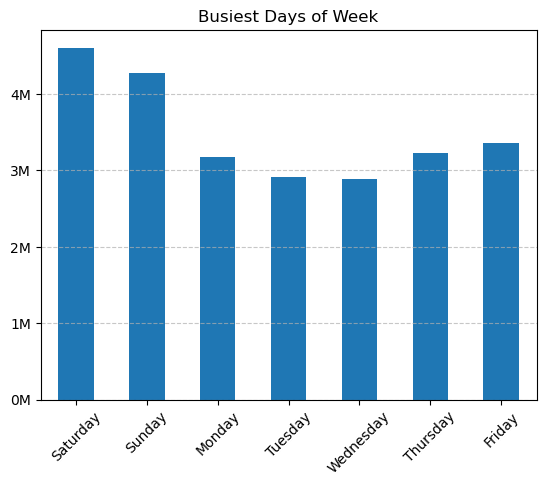

In [9]:
# Plot bar chart to show busiest days

ax = stakeholder_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

#Defining the desired names for each day of the week
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#Customize x-axis labels
ax.set_xticklabels(day_names, rotation=45)

# Add labels and a title
plt.xlabel('')
plt.ylabel('')
plt.title('Busiest Days of Week')

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days_of_week.png'))

# Show the plot
plt.show()

The busiest days of the week are weekend days, with midweek days being least busy.

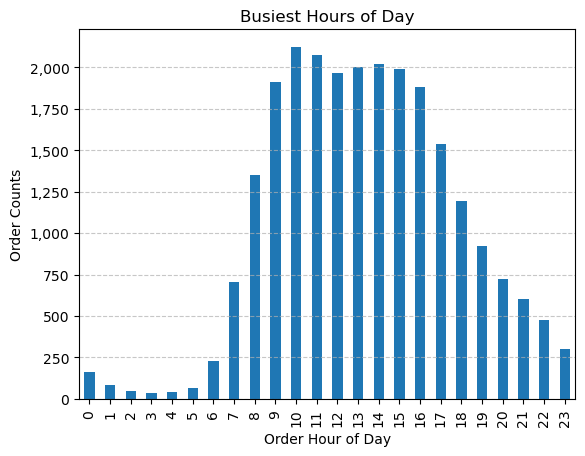

In [10]:
# Plot bar chart to show busiest hours of day

ax = stakeholder_df['order_hour_of_day'].value_counts().sort_index().plot.bar()

# Add labels and a title
plt.xlabel('Order Hour of Day')
plt.ylabel('Order Counts')
plt.title('Busiest Hours of Day')

#Changing y-axis to display values in thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e3)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_hours_of_day.png'))

# Show the plot
plt.show()

Peak ordering hours are between 8 AM and 6 PM.

## 03. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [11]:
# Creating sample of the data to speed up processing time
# Splitting dataframe into 2 samples with the same distribution (70/30)

np.random.seed(4)
dev = np.random.rand(len(stakeholder_df)) <= 0.7

In [12]:
# Creating 'big' and 'small' sampled dataframes

big = stakeholder_df[dev]
small = stakeholder_df[~dev]

In [13]:
# Check sampling (big + small should equal length of stakeholder_df)
len(stakeholder_df)

24436791

In [14]:
len(big + small)

24436791

In [15]:
# Confirmed samples

In [16]:
# Create dataframe using 'order_hour_of_day' and 'prices' columns using the 'small' dataframe
df_ohod_prices = small[['order_hour_of_day', 'prices']]

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


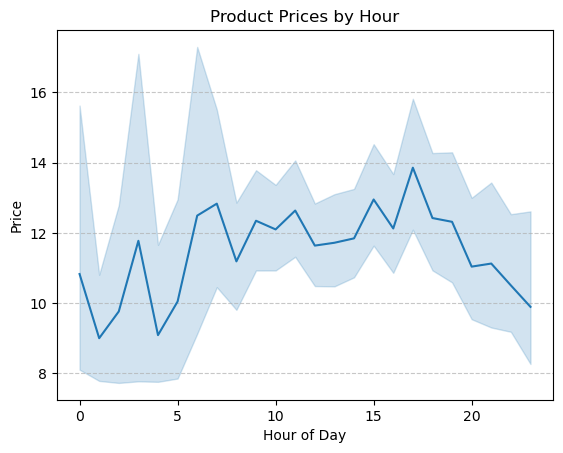

In [17]:
# Plot line chart

line = sns.lineplot(data = df_ohod_prices, x = 'order_hour_of_day', y = 'prices')

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Add labels and title
plt.title('Product Prices by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Price')

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_prices_by_hour_line.png'))

Prices of products purchased peak in the evening (around 5 PM).

In [18]:
# Calculate total sales per hour

#Group by hours, then calculate the sum of prices
grouped_hours = stakeholder_df.groupby('order_hour_of_day')['prices'].sum().reset_index()
grouped_hours

,order_hour_of_day,prices
0,0,1695088.0
1,1,829938.8
2,2,840053.5
3,3,396938.4
4,4,415306.5
5,5,812248.4
6,6,2748655.6
7,7,8544423.5
8,8,16371827.0
9,9,22131117.7


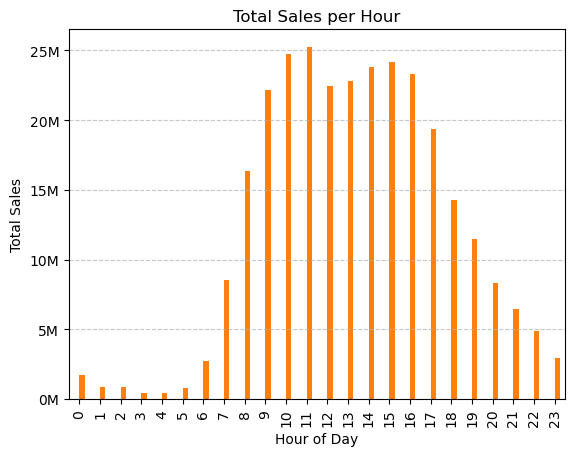

In [19]:
#Plotting bar chart
ax = stakeholder_df.groupby('order_hour_of_day')['prices'].sum().reset_index().plot.bar(legend=None)

plt.title('Total Sales per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save plot before showing
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_sales_per_hour.png'))

#Show plot
plt.show()

Between the hours of 9 AM and 4 PM, customers spent over $20M total during each of these hours.

## 04. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [20]:
# Creating column 'price_range' using the below criteria:
#If the item’s price is lower than or equal to 5 dollars, it will be labeled a “low-range”.
#If the item’s price is above 5 dollars but lower than or equal to 15 dollars, it will be labeled a “mid-range”.
#If the item’s price is above 15 dollars, it will be labeled a “high-range”.

#Define function
def price_label(row):
    if row ['prices'] <= 5:
        return 'Low-range product'
    elif (row ['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row ['prices'] > 15:
        return 'High range'
    else: return np.nan

In [21]:
# Apply function to dataframe
stakeholder_df['price_range'] = stakeholder_df.apply(price_label, axis = 1)

In [22]:
# Check frequency of new column
stakeholder_df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    16501309
Low-range product     7626794
High range             308688
Name: count, dtype: int64

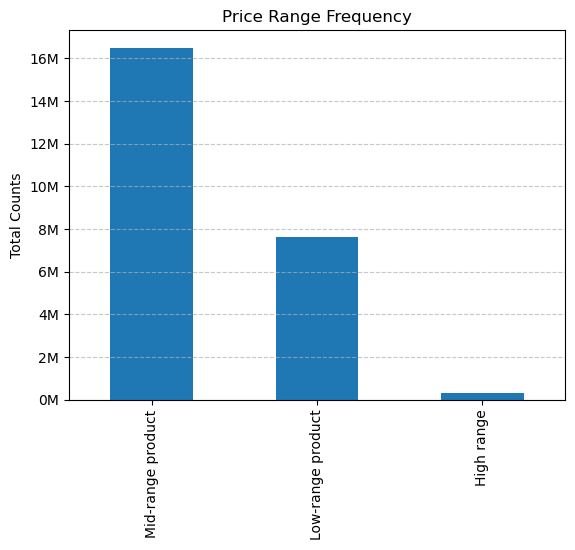

In [23]:
# Plot frequency of 'price_range' column

ax = stakeholder_df['price_range'].value_counts(dropna = True).plot.bar(legend=None)

plt.title('Price Range Frequency')
plt.xlabel('')
plt.ylabel('Total Counts')

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save plot before showing
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_frequency.png'))

#Show plot
plt.show()

Mid-range products are purchased at a much higher frequency than low or high-range products. Products costing more than $15 are rarely purchased.

## 05. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [24]:
# Creating a variable containing the department names
# Creating a dictionary

department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [25]:
# View dictionary
department_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [26]:
#Convert 'department_id' to string to match the keys in the dictionary
stakeholder_df['department_id'] = stakeholder_df['department_id'].astype(str)

In [27]:
# Map 'department_id' to 'department_name' using the dictionary
stakeholder_df['department_name'] = stakeholder_df['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [28]:
# View results to ensure 'department_name' was added
stakeholder_df.head()

,user_id,order_id,prices,department_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,Busiest days,busiest_period_of_day,loyalty_flag,spend_flag,customer_frequency,age,number_of_dependants,fam_status,income,region,price_range,department_name
0,138,3139998,5.8,19,28,6,11,3.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest,Mid-range product,snacks
1,138,1977647,5.8,19,30,6,17,20.0,Regularly busy days,Average orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest,Mid-range product,snacks
3,138,2254091,20.0,12,10,5,14,6.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest,High range,meat seafood
4,138,505689,12.9,10,9,6,12,7.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest,Mid-range product,bulk
5,138,960220,1.7,4,17,5,14,19.0,Regularly busy days,Most orders,Regular customer,Low spender,Frequent customer,81,1,married,49620,Midwest,Low-range product,produce


In [29]:
# Count values within new column
stakeholder_df['department_name'].value_counts(dropna = False)

department_name
produce            7227091
dairy eggs         4132060
snacks             2187121
beverages          2036466
frozen             1628844
pantry             1385520
bakery              886698
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           530401
meat seafood        523891
babies              335947
personal care       328569
international       197900
alcohol             108002
pets                 72115
missing              57567
bulk                 27558
other                27166
Name: count, dtype: int64

In [30]:
# Check flags to ensure nothing strange
stakeholder_df.groupby('department_name').agg({'department_id' : ['min', 'max']})

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

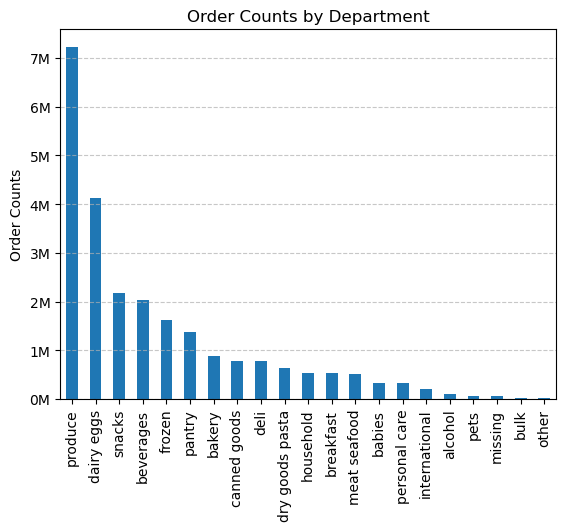

In [31]:
# Plotting bar chart for value counts of each department

ax = stakeholder_df['department_name'].value_counts().plot.bar()

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts')
plt.title('Order Counts by Department')

# Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_counts_by_department.png'))

# Show the plot
plt.show()

Produce stands out as the highest ordered department, with an order count exceeding 7 million. The dairy eggs department also has an impressive order count, exceeding 4 million. Bulk goods, pets, and alcohol departments are all ordered from relatively infrequently.

## 06. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.

### Are there differences in ordering habits based on a customer’s loyalty status?

In [32]:
# Average "days_since_prior_order" per customer loyalty
avg_usage_per_loyalty = pd.pivot_table(stakeholder_df, values='days_since_prior_order', index='loyalty_flag', aggfunc='mean').reset_index()
avg_usage_per_loyalty

,loyalty_flag,days_since_prior_order
0,Loyal customer,5.954549
1,New customer,17.708799
2,Regular customer,11.917612


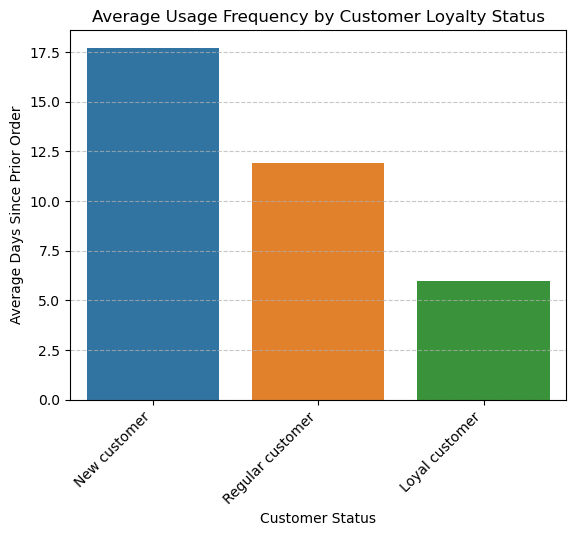

In [46]:
# Determining the order of loyalty categories based on average days since prior order
loyalty_order = avg_usage_per_loyalty.groupby('loyalty_flag')['days_since_prior_order'].mean().sort_values(ascending = False).index

# Plotting the bar chart with specified order
ax = sns.barplot(x='loyalty_flag', y='days_since_prior_order', data=avg_usage_per_loyalty, order=loyalty_order)

plt.title('Average Usage Frequency by Customer Loyalty Status')
plt.xlabel('Customer Status')
plt.ylabel('Average Days Since Prior Order')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_usage_by_loyalty.png'))

# Show the plot
plt.show()

Loyal customers use the Instacart app much more frequently than new customers or even regular customers. Loyal customers place orders twice as often as regular customers.

### Are there differences in ordering habits based on a customer’s region?

In [35]:
# Average "days_since_prior_order" by region
avg_usage_per_region = pd.pivot_table(stakeholder_df, values='days_since_prior_order', index='region', aggfunc='mean').reset_index()
avg_usage_per_region

,region,days_since_prior_order
0,Midwest,10.175814
1,Northeast,10.050408
2,South,10.084949
3,West,10.027290


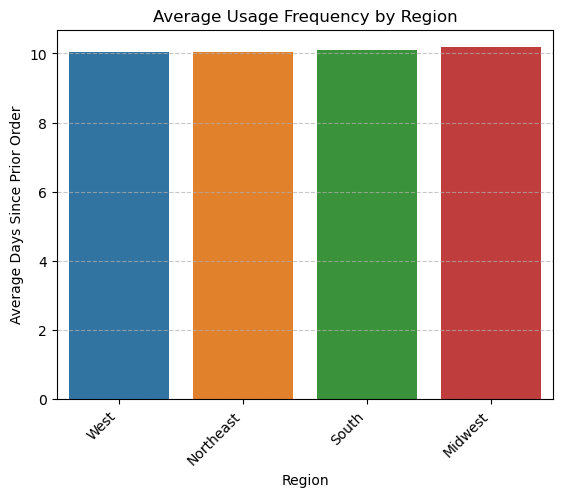

In [36]:
# Determining the order of region categories based on average days since prior order
region_order = avg_usage_per_region.groupby('region')['days_since_prior_order'].mean().sort_values().index

# Plotting the bar chart with specified order
ax = sns.barplot(x='region', y='days_since_prior_order', data=avg_usage_per_region, order=region_order)

plt.title('Average Usage Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Average Days Since Prior Order')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_usage_by_region.png'))

# Show the plot
plt.show()

Users across all US regions have similar ordering habits, placing orders apprxomiately every 10 days.

In [37]:
# Total prices by region
tot_prices_per_region = pd.pivot_table(stakeholder_df, values='prices', index='region', aggfunc='sum').reset_index()
tot_prices_per_region

,region,prices
0,Midwest,73749506.2
1,Northeast,48774941.3
2,South,98272615.5
3,West,68276709.7


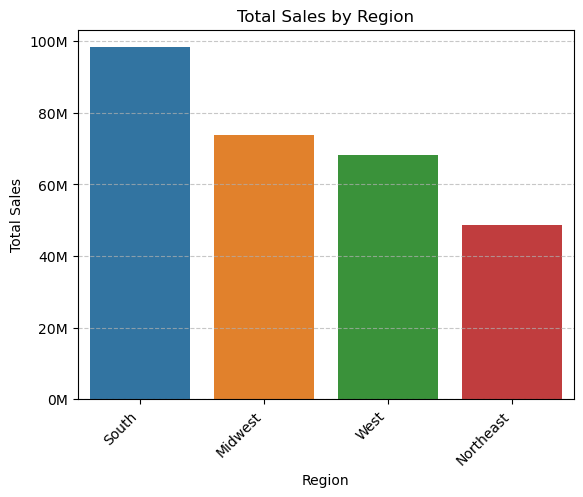

In [45]:
# Determining the order of region categories based on total prices
region_order_price = tot_prices_per_region.groupby('region')['prices'].sum().sort_values(ascending = False).index

# Plotting the bar chart with specified order
ax = sns.barplot(x='region', y='prices', data=tot_prices_per_region, order=region_order_price)

plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_sales_by_region.png'))

# Show the plot
plt.show()

The US' Southern region stands out with highest sales, totaling almost 100 million.

### Analyzing which departments are most ordered from based on region.

In [71]:
# Filter the DataFrame for the 'South' region
south_data = stakeholder_df[stakeholder_df['region'] == 'South']
# Get the counts of each 'department' within the 'South' region
south_department_counts = south_data['department_name'].value_counts()

In [70]:
south_department_counts

department_name
produce            2409221
dairy eggs         1375399
snacks              724967
beverages           680605
frozen              546226
pantry              458584
bakery              293920
canned goods        263145
deli                259644
dry goods pasta     210680
household           176971
breakfast           176219
meat seafood        173933
babies              113970
personal care       110522
international        65417
alcohol              36261
pets                 23014
missing              19273
other                 9200
bulk                  9184
Name: count, dtype: int64

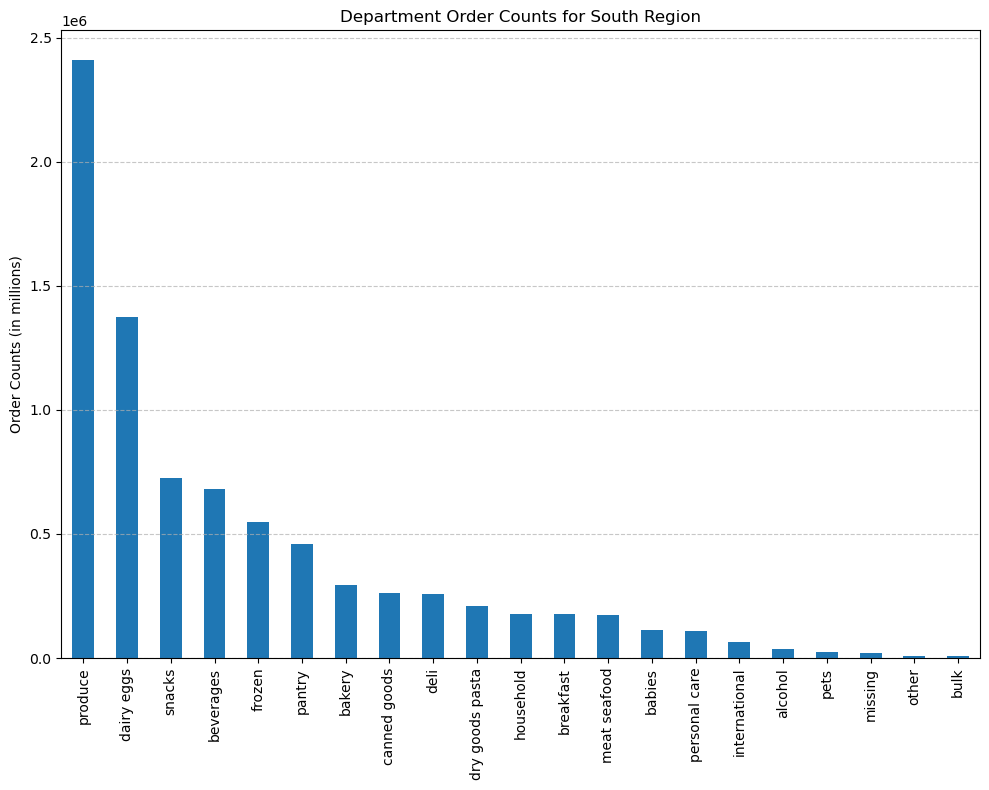

In [115]:
# Departments by 'South' bar chart

# Filter the DataFrame for the 'South' region
south_data = stakeholder_df[stakeholder_df['region'] == 'South']

# Get the counts of each 'department' within the 'South' region
south_department_counts = south_data['department_name'].value_counts()

# Plotting bar chart for 'department_name' counts in the 'South' region
plt.figure(figsize=(10, 8)) 

south_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for South Region')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_in_south.png'))

# Show the plot
plt.show()

Top 3 departments in the Southern region are produce, dairy eggs, and snacks.

In [74]:
# Filter the DataFrame for the 'Midwest' region
midwest_data = stakeholder_df[stakeholder_df['region'] == 'Midwest']
# Get the counts of each 'department' within the 'Midwest' region
midwest_department_counts = midwest_data['department_name'].value_counts()

In [75]:
midwest_department_counts

department_name
produce            1695851
dairy eggs          964899
snacks              509148
beverages           472248
frozen              381304
pantry              326402
bakery              206050
canned goods        184194
deli                182735
dry goods pasta     148529
household           128464
breakfast           122978
meat seafood        122137
babies               78496
personal care        77806
international        46607
alcohol              25574
pets                 16481
missing              13835
bulk                  6488
other                 6284
Name: count, dtype: int64

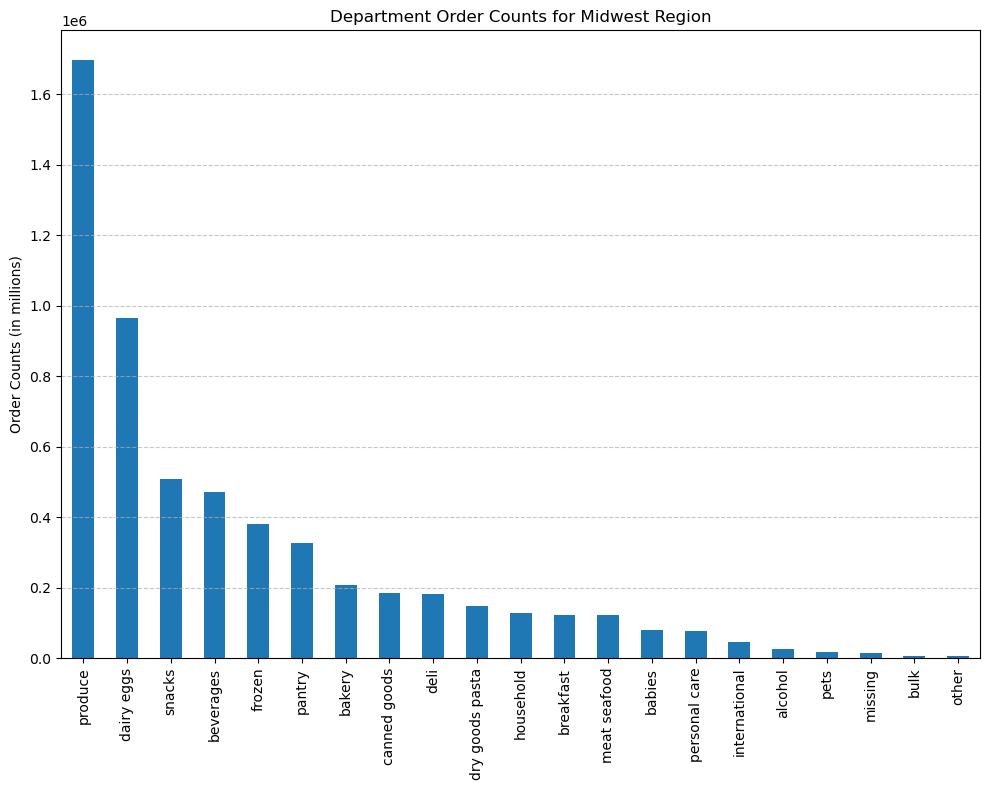

In [76]:
# Departments by 'Midwest' bar chart

# Plotting bar chart for 'department_name' counts in the 'Midwest' region
plt.figure(figsize=(10, 8)) 

midwest_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Midwest Region')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_in_midwest.png'))

# Show the plot
plt.show()

Top 3 department categories for the Midwest are produce, dairy eggs, and snacks - same as the South region.

In [77]:
# Filter the DataFrame for the 'West' region
west_data = stakeholder_df[stakeholder_df['region'] == 'West']
# Get the counts of each 'department' within the 'West' region
west_department_counts = west_data['department_name'].value_counts()

In [78]:
west_department_counts

department_name
produce            1852659
dairy eggs         1059917
snacks              563273
beverages           515745
frozen              417751
pantry              356781
bakery              228405
canned goods        202501
deli                201079
dry goods pasta     163808
household           137487
breakfast           137481
meat seafood        135511
babies               83926
personal care        82368
international        51385
alcohol              27623
pets                 18540
missing              14180
bulk                  7288
other                 6750
Name: count, dtype: int64

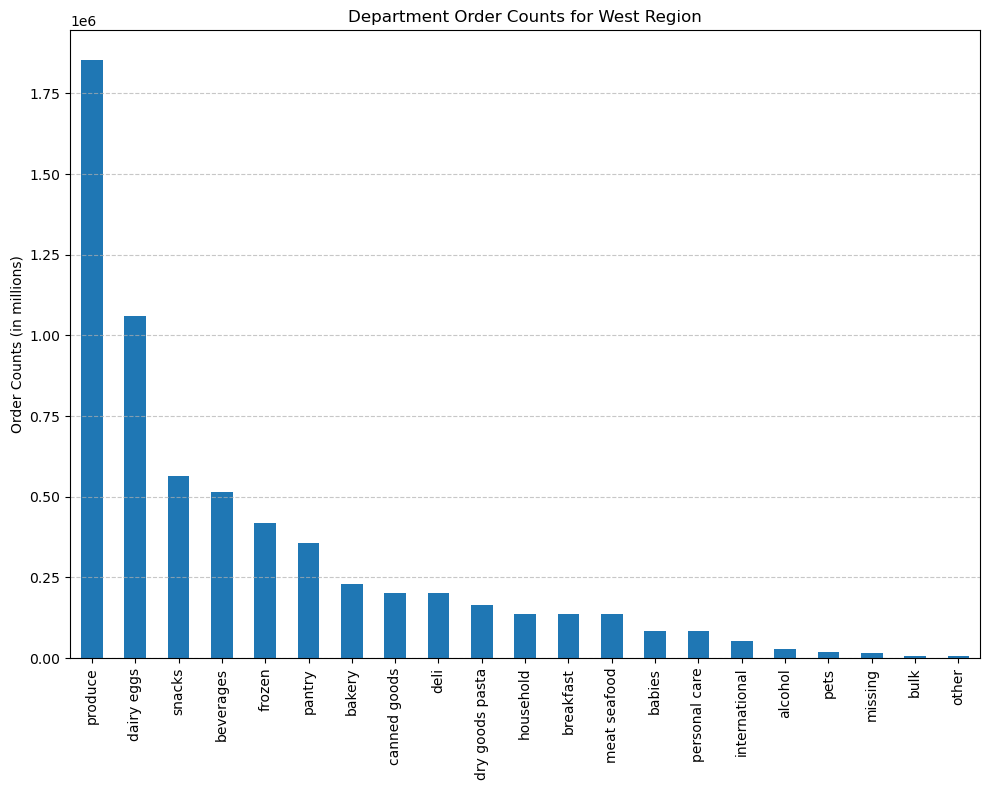

In [79]:
# Departments by 'West' bar chart

# Plotting bar chart for 'department_name' counts in the 'West' region
plt.figure(figsize=(10, 8)) 

west_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for West Region')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_in_west.png'))

# Show the plot
plt.show()

Produce, dairy eggs, and snacks continue as the top 3 department categories for the West region.

In [80]:
# Filter the DataFrame for the 'Northeast' region
northeast_data = stakeholder_df[stakeholder_df['region'] == 'Northeast']
# Get the counts of each 'department' within the 'Northeast' region
northeast_department_counts = northeast_data['department_name'].value_counts()

In [81]:
northeast_department_counts

department_name
produce            1269360
dairy eggs          731845
snacks              389733
beverages           367868
frozen              283563
pantry              243753
bakery              158323
deli                139553
canned goods        137950
dry goods pasta     110708
household            96427
breakfast            93723
meat seafood         92310
babies               59555
personal care        57873
international        34491
alcohol              18544
pets                 14080
missing              10279
other                 4932
bulk                  4598
Name: count, dtype: int64

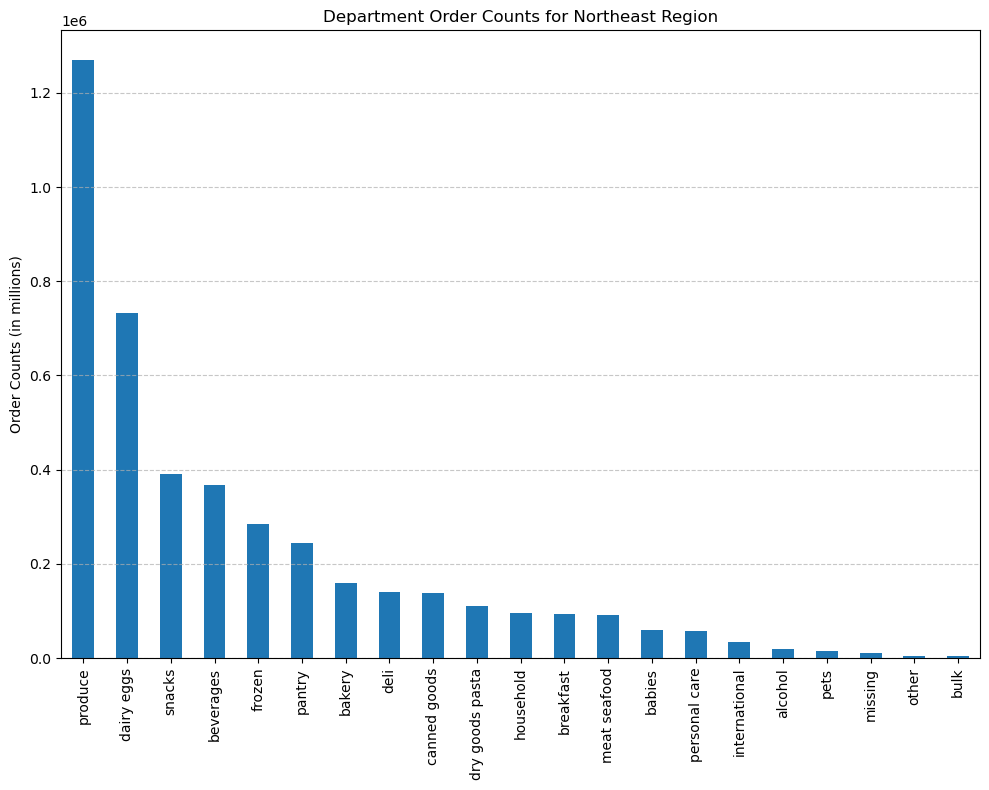

In [82]:
# Departments by 'Northeast' bar chart

# Plotting bar chart for 'department_name' counts in the 'Northeast' region
plt.figure(figsize=(10, 8)) 

northeast_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Northeast Region')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_in_northeast.png'))

# Show the plot
plt.show()

Across all regions, the top 3 departments that are ordered from are produce, dairy eggs, and snacks.

### Are there differences in ordering habits based on a customer's family status?

In [40]:
# Average "days_since_prior_order" by family_status
avg_usage_per_famstatus = pd.pivot_table(stakeholder_df, values='days_since_prior_order', index='fam_status', aggfunc='mean').reset_index()
avg_usage_per_famstatus

,fam_status,days_since_prior_order
0,divorced/widowed,10.038846
1,living with parents and siblings,10.031570
2,married,10.096826
3,single,10.076067


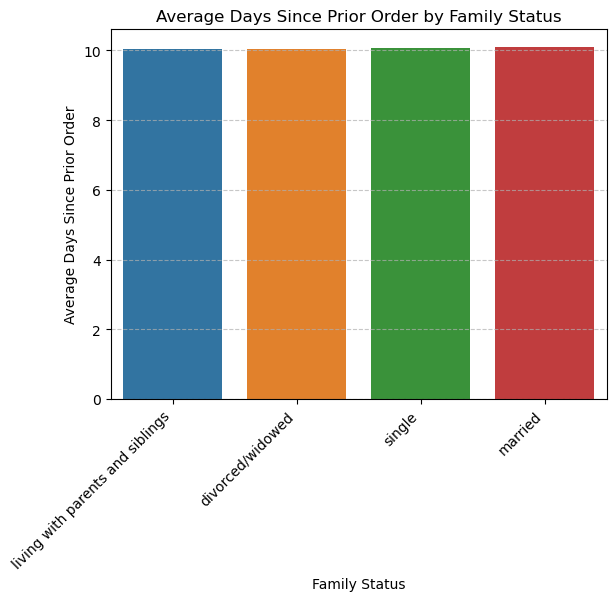

In [41]:
# Determining the order of family_status categories based on avg days_since_prior_order
famstatus_order = avg_usage_per_famstatus.groupby('fam_status')['days_since_prior_order'].mean().sort_values().index

# Plotting the bar chart with specified order
ax = sns.barplot(x='fam_status', y='days_since_prior_order', data=avg_usage_per_famstatus, order=famstatus_order)

plt.title('Average Days Since Prior Order by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Days Since Prior Order')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_days_since_prior_order_fam_status.png'))

# Show the plot
plt.show()

Family status does not play a role in usage frequency.

In [42]:
# Total prices by family status
tot_prices_per_famstatus = pd.pivot_table(stakeholder_df, values='prices', index='fam_status', aggfunc='sum').reset_index()
tot_prices_per_famstatus

,fam_status,prices
0,divorced/widowed,23754435.0
1,living with parents and siblings,12548107.9
2,married,203008015.3
3,single,49763214.5


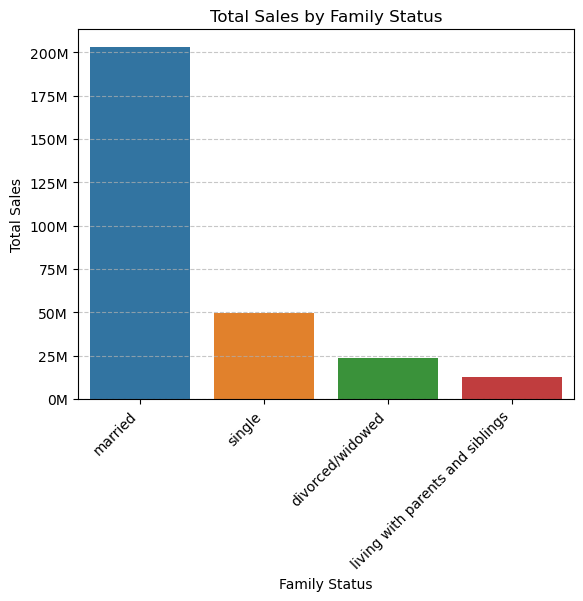

In [44]:
# Determining the order of region categories based on total prices
famstatus_order_price = tot_prices_per_famstatus.groupby('fam_status')['prices'].sum().sort_values(ascending = False).index

# Plotting the bar chart with specified order
ax = sns.barplot(x='fam_status', y='prices', data=tot_prices_per_famstatus, order=famstatus_order_price)

plt.title('Total Sales by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_sales_by_famstatus.png'))

# Show the plot
plt.show()

Customers with a family status of 'married' represent a huge number of sales, totaling over $200 million, which is quadruple that of the second-highest total sales by family status category of 'single.'

### Analyzing which departments are most ordered from based on family status.

In [85]:
# Filter the DataFrame for the 'married' family status
married_data = stakeholder_df[stakeholder_df['fam_status'] == 'married']
# Get the counts of each 'department' within the 'married' family status
married_department_counts = married_data['department_name'].value_counts()

In [86]:
married_department_counts

department_name
produce            5070504
dairy eggs         2898199
snacks             1537764
beverages          1430083
frozen             1143450
pantry              972979
bakery              621487
canned goods        554557
deli                547474
dry goods pasta     445705
household           381394
breakfast           372365
meat seafood        370434
babies              236039
personal care       230556
international       138203
alcohol              73740
pets                 49675
missing              40464
bulk                 19626
other                18771
Name: count, dtype: int64

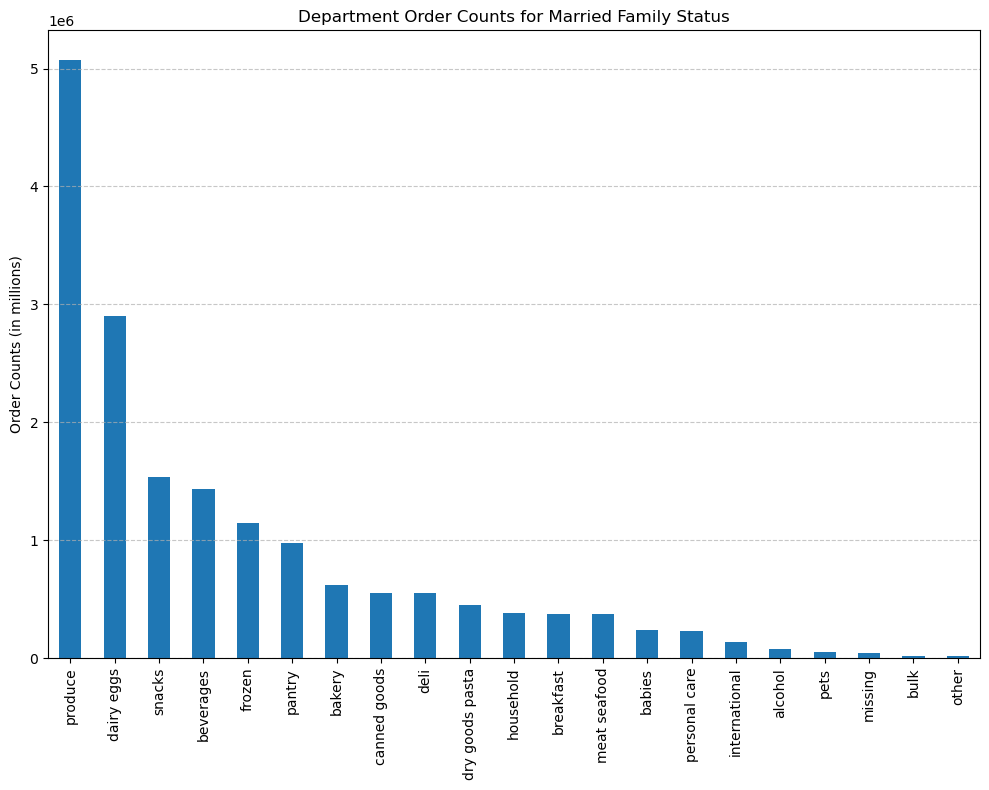

In [87]:
# Departments by 'married' family status bar chart

# Plotting bar chart for 'department_name' with 'married' family status
plt.figure(figsize=(10, 8)) 

married_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Married Family Status')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_married_famstatus.png'))

# Show the plot
plt.show()

The top family status of 'married' orders most frequently from the top three departments that have been identified throughout this analysis: produce, dairy eggs, and snacks.

In [88]:
# Filter the DataFrame for the 'married' family status
single_data = stakeholder_df[stakeholder_df['fam_status'] == 'single']
# Get the counts of each 'department' within the 'single' family status
single_department_counts = single_data['department_name'].value_counts()

In [89]:
single_department_counts

department_name
produce            1193308
dairy eggs          679603
snacks              358618
beverages           336605
frozen              264121
pantry              226715
bakery              146653
canned goods        130026
deli                129921
dry goods pasta     103240
household            86991
breakfast            86691
meat seafood         83652
babies               56538
personal care        54194
international        33073
alcohol              19026
pets                 11988
missing               9623
other                 4668
bulk                  4372
Name: count, dtype: int64

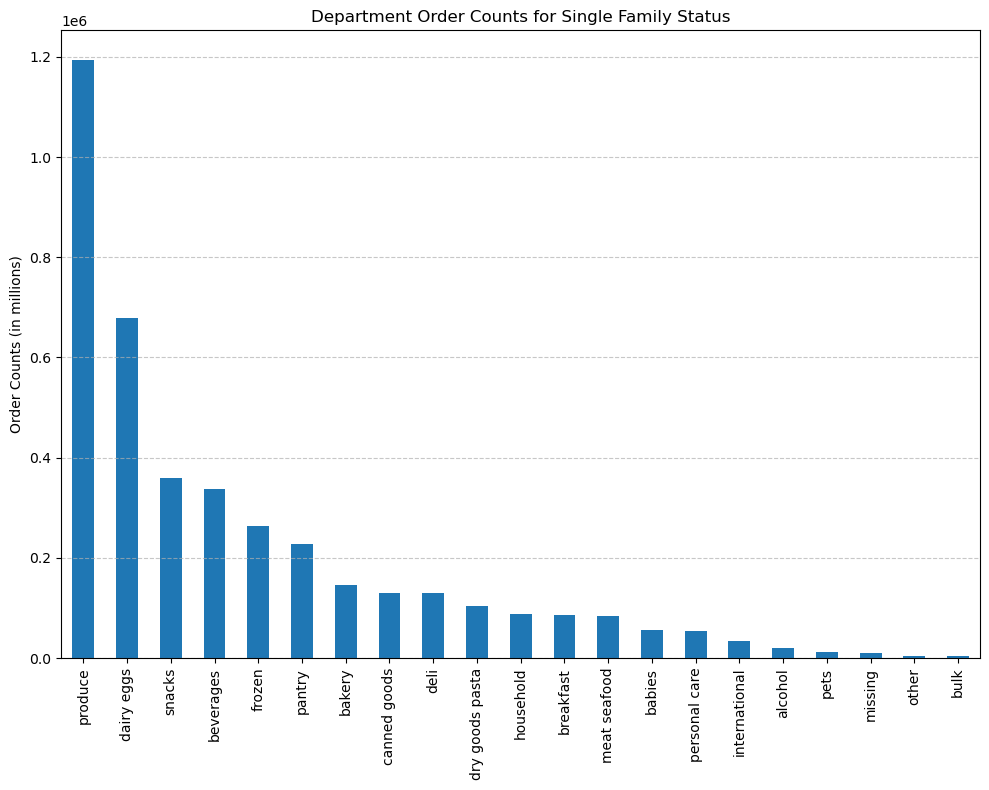

In [90]:
# Departments by 'single' family status bar chart

# Plotting bar chart for 'department_name' with 'single' family status
plt.figure(figsize=(10, 8)) 

single_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Single Family Status')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_single_famstatus.png'))

# Show the plot
plt.show()

Produce, dairy eggs, and snacks continue to prevail as the top three most ordered-from departments as we examine the 'single' family status.

In [91]:
# Filter the DataFrame for the 'divorced/widowed' family status
divorced_widowed_data = stakeholder_df[stakeholder_df['fam_status'] == 'divorced/widowed']
# Get the counts of each 'department' within the 'divorced/widowed' family status
divorced_widowed_department_counts = divorced_widowed_data['department_name'].value_counts()

In [92]:
divorced_widowed_department_counts

department_name
produce            619577
dairy eggs         353702
snacks             186821
beverages          175453
frozen             141707
pantry             118647
bakery              75831
deli                68073
canned goods        65423
dry goods pasta     54174
household           45168
breakfast           44896
meat seafood        44554
personal care       28192
babies              27775
international       16965
alcohol              8952
pets                 6262
missing              4509
other                2267
bulk                 2213
Name: count, dtype: int64

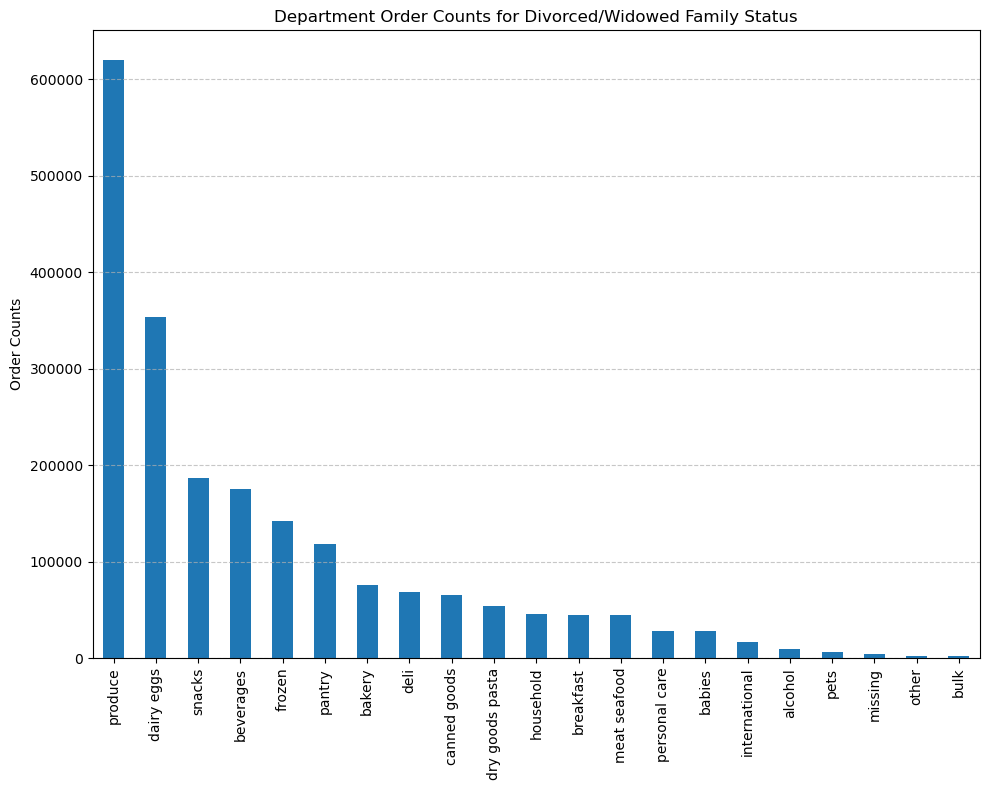

In [94]:
# Departments by 'divorced/widowed' family status bar chart

# Plotting bar chart for 'department_name' with 'divorced/widowed' family status
plt.figure(figsize=(10, 8)) 

divorced_widowed_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts')
plt.title('Department Order Counts for Divorced/Widowed Family Status')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_divorced_widowed_famstatus.png'))

# Show the plot
plt.show()

The divorced/widowed family status also orders most frequently from our top three departments.

In [96]:
# Filter the DataFrame for the 'living with parents and siblings' family status
live_with_parents_data = stakeholder_df[stakeholder_df['fam_status'] == 'living with parents and siblings']
# Get the counts of each 'department' within the 'living with parents and siblings' family status
live_with_parents_department_counts = live_with_parents_data['department_name'].value_counts()

In [98]:
live_with_parents_department_counts

department_name
produce            343702
dairy eggs         200556
snacks             103918
beverages           94325
frozen              79566
pantry              67179
bakery              42727
canned goods        37784
deli                37543
dry goods pasta     30606
breakfast           26449
household           25796
meat seafood        25251
personal care       15627
babies              15595
international        9659
alcohol              6284
pets                 4190
missing              2971
other                1460
bulk                 1347
Name: count, dtype: int64

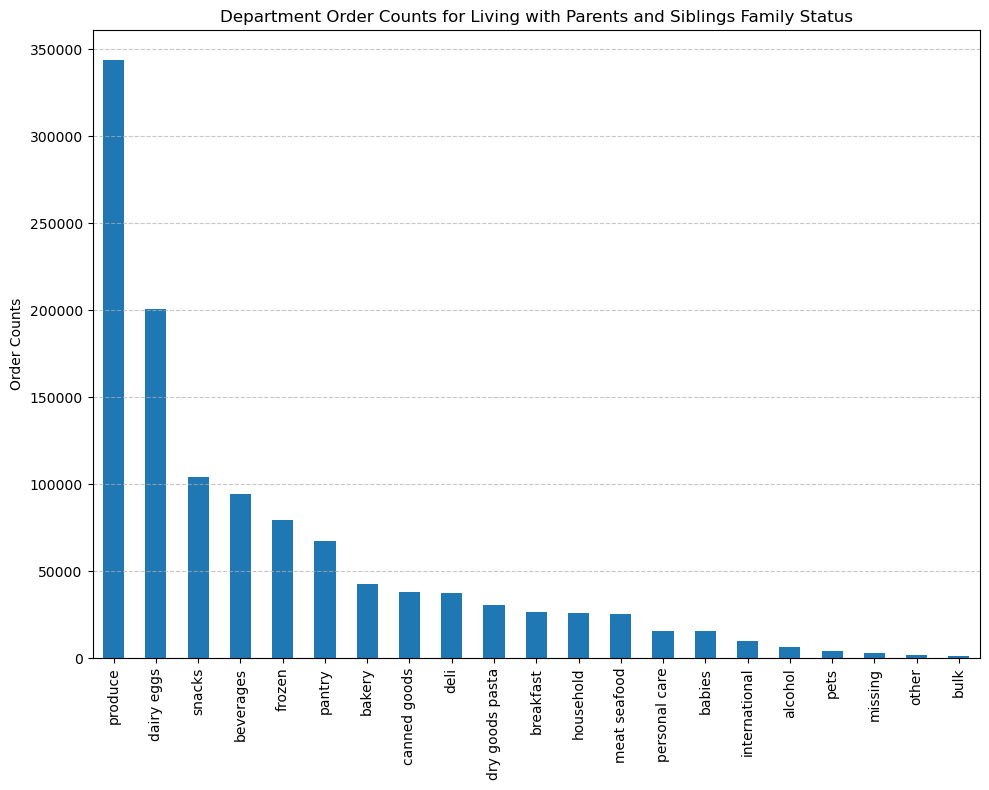

In [99]:
# Departments by 'living with parents and siblings' family status bar chart

# Plotting bar chart for 'department_name' with 'living with parents and siblings' family status
plt.figure(figsize=(10, 8)) 

live_with_parents_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts')
plt.title('Department Order Counts for Living with Parents and Siblings Family Status')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_live_with_parents_famstatus.png'))

# Show the plot
plt.show()

Regardless of family status, the top ordered-from departments does not change.

### Are there differences in ordering habits based on a customer's age?

*  Creating 'age_profile' variable, divided into three categories:
    * Young adult (ages 18-39)
    * Adult (ages 40-64)
    * Senior (ages 65+)

In [48]:
# Create age conditions

In [49]:
#If the user is <= 39 years of age, 'age_profile' will reflect 'Young adult'
stakeholder_df.loc[stakeholder_df['age'] <= 39, 'age_profile'] = 'Young adult'

In [51]:
# If the user is between the ages of 40 and 64 (or equal to either of the 2 ages), 'age_profile' will reflect 'Adult'
stakeholder_df.loc[(stakeholder_df['age'] >= 40) & (stakeholder_df['age'] <= 64), 'age_profile'] = 'Adult'

In [52]:
# If the user is of age 65 years or older, 'age_profile' will reflect 'Senior'
stakeholder_df.loc[stakeholder_df['age'] >= 65, 'age_profile'] = 'Senior'

In [53]:
# Check the output of new column 'age_profile'
stakeholder_df['age_profile'].value_counts(dropna = False)

age_profile
Adult          9546341
Young adult    8426468
Senior         6463982
Name: count, dtype: int64

In [54]:
# Check flags
stakeholder_df.groupby('age_profile').agg({'age' : ['min', 'max']})

age    
            min max
age_profile        
Adult        40  64
Senior       65  81
Young adult  18  39

In [56]:
# Average "days_since_prior_order" by age_profile
avg_usage_per_age = pd.pivot_table(stakeholder_df, values='days_since_prior_order', index='age_profile', aggfunc='mean').reset_index()
avg_usage_per_age

,age_profile,days_since_prior_order
0,Adult,10.083421
1,Senior,10.077492
2,Young adult,10.093472


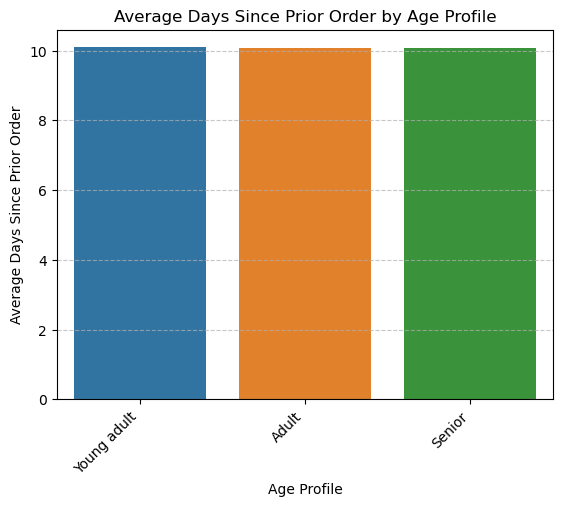

In [57]:
# Determining the order of family_status categories based on avg days_since_prior_order
age_order = avg_usage_per_age.groupby('age_profile')['days_since_prior_order'].mean().sort_values(ascending = False).index

# Plotting the bar chart with specified order
ax = sns.barplot(x='age_profile', y='days_since_prior_order', data=avg_usage_per_age, order=age_order)

plt.title('Average Days Since Prior Order by Age Profile')
plt.xlabel('Age Profile')
plt.ylabel('Average Days Since Prior Order')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_days_since_prior_order_by_ageprof.png'))

# Show the plot
plt.show()

Age does not play a role in usage frequency.

In [58]:
# Total prices by age profile
tot_prices_per_age = pd.pivot_table(stakeholder_df, values='prices', index='age_profile', aggfunc='sum').reset_index()
tot_prices_per_age

,age_profile,prices
0,Adult,112549210.3
1,Senior,75136316.2
2,Young adult,101388246.2


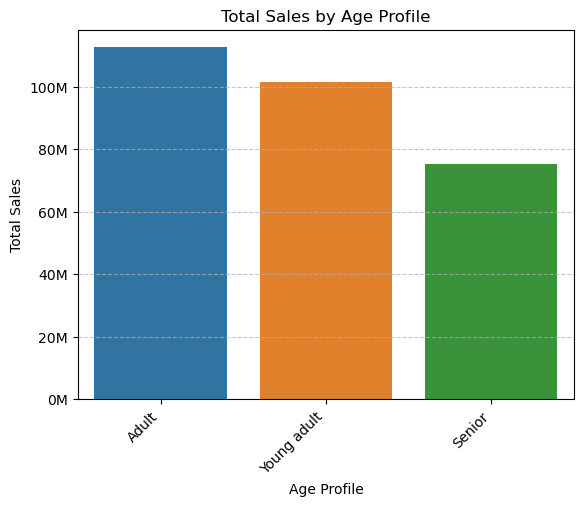

In [59]:
# Determining the order of age_profile categories based on total prices
ageprof_order_price = tot_prices_per_age.groupby('age_profile')['prices'].sum().sort_values(ascending = False).index

# Plotting the bar chart with specified order
ax = sns.barplot(x='age_profile', y='prices', data=tot_prices_per_age, order=ageprof_order_price)

plt.title('Total Sales by Age Profile')
plt.xlabel('Age Profile')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adjust layout to ensure everything fits
plt.tight_layout

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_sales_by_ageprof.png'))

# Show the plot
plt.show()

All three age profiles contribute significantly to total sales, but adults contribute most with total sales of over $100 million.

### Analyzing which departments are ordered from most frequently based on customer age profile.

In [100]:
# Filter the DataFrame for the 'Adult' age profile
adult_data = stakeholder_df[stakeholder_df['age_profile'] == 'Adult']
# Get the counts of each 'department' within the 'Adult' age profile
adult_department_counts = adult_data['department_name'].value_counts()

In [101]:
adult_department_counts

department_name
produce            2815940
dairy eggs         1607350
snacks              853132
beverages           802002
frozen              638324
pantry              542449
bakery              347380
canned goods        307450
deli                306243
dry goods pasta     247593
household           210429
breakfast           208527
meat seafood        204004
babies              133913
personal care       130439
international        77410
alcohol              42239
pets                 27764
missing              22549
bulk                 10620
other                10584
Name: count, dtype: int64

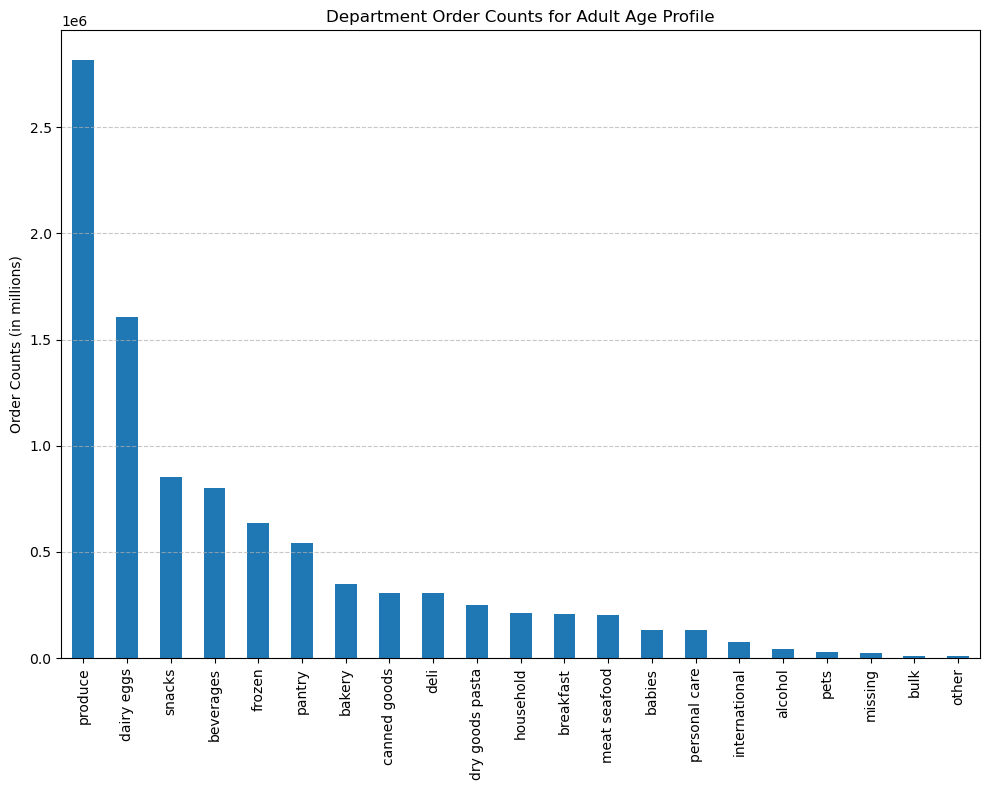

In [102]:
# Departments by 'Adult' age profile bar chart

# Plotting bar chart for 'department_name' with 'adult' age profile
plt.figure(figsize=(10, 8)) 

adult_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Adult Age Profile')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_adult_ageprof.png'))

# Show the plot
plt.show()

Produce, dairy eggs, and snacks, once again, claim the top three spots, this time for our top age profile 'adult.' Beverages are not far behind snacks.

In [103]:
# Filter the DataFrame for the 'Young adult' age profile
ya_data = stakeholder_df[stakeholder_df['age_profile'] == 'Young adult']
# Get the counts of each 'department' within the 'Adult' age profile
ya_department_counts = ya_data['department_name'].value_counts()

In [104]:
ya_department_counts

department_name
produce            2493841
dairy eggs         1433831
snacks              758439
beverages           692425
frozen              557257
pantry              476316
bakery              305661
canned goods        272429
deli                270136
dry goods pasta     218776
household           185038
breakfast           183783
meat seafood        179207
babies              115616
personal care       112403
international        68739
alcohol              38755
pets                 24625
missing              20088
bulk                  9553
other                 9550
Name: count, dtype: int64

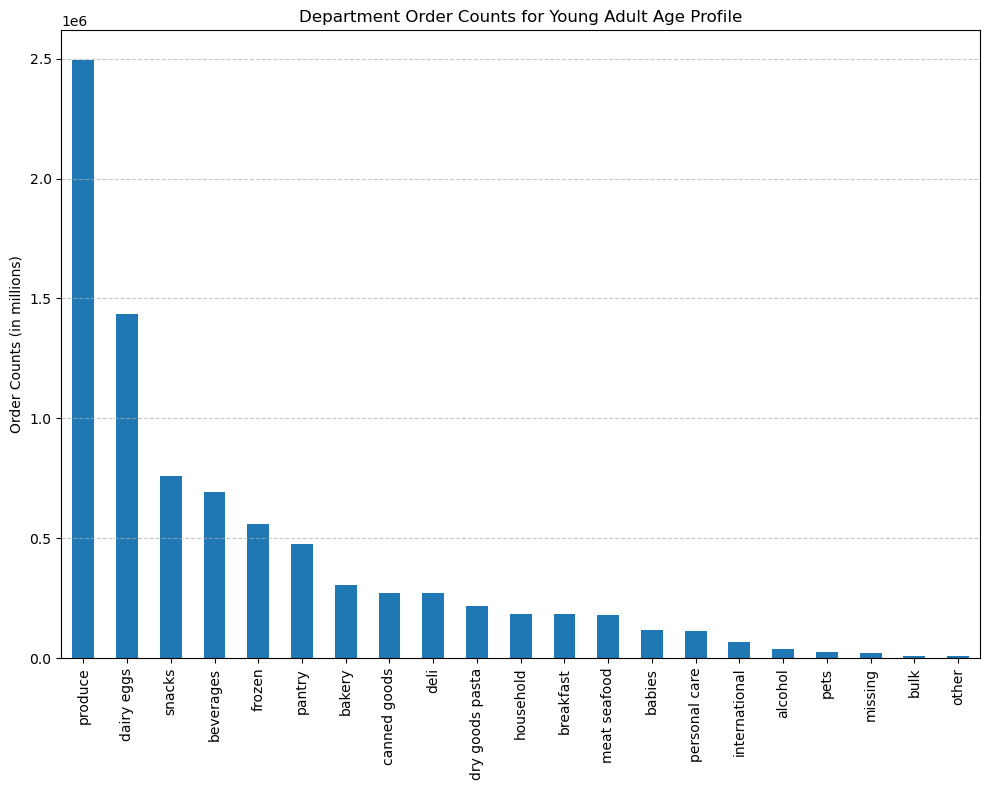

In [105]:
# Departments by 'Young adult' age profile bar chart

# Plotting bar chart for 'department_name' with 'Young adult' age profile
plt.figure(figsize=(10, 8)) 

ya_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Young Adult Age Profile')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_ya_ageprof.png'))

# Show the plot
plt.show()

Produce, dairy eggs, and snacks remain as the top three ordered-from departments for our 'Young adult' age profile. They order least from other, bulk, pets, and alcohol.

In [106]:
# Filter the DataFrame for the 'Senior' age profile
senior_data = stakeholder_df[stakeholder_df['age_profile'] == 'Senior']
# Get the counts of each 'department' within the 'Adult' age profile
senior_department_counts = senior_data['department_name'].value_counts()

In [107]:
senior_department_counts

department_name
produce            1917310
dairy eggs         1090879
snacks              575550
beverages           542039
frozen              433263
pantry              366755
bakery              233657
canned goods        207911
deli                206632
dry goods pasta     167356
household           143882
meat seafood        140680
breakfast           138091
babies               86418
personal care        85727
international        51751
alcohol              27008
pets                 19726
missing              14930
bulk                  7385
other                 7032
Name: count, dtype: int64

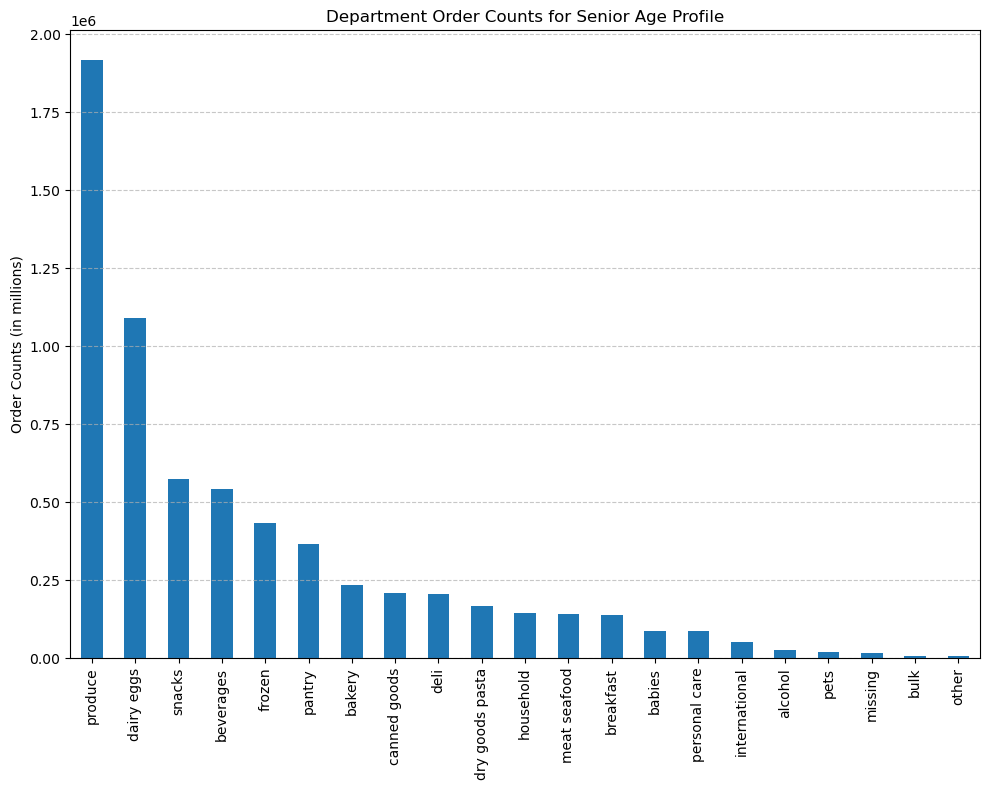

In [109]:
# Departments by 'Senior' age profile bar chart

# Plotting bar chart for 'department_name' with 'Senior' age profile
plt.figure(figsize=(10, 8)) 

senior_department_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('')
plt.ylabel('Order Counts (in millions)')
plt.title('Department Order Counts for Senior Age Profile')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_senior_ageprof.png'))

# Show the plot
plt.show()

Regardless of age profile, the top ordered-from departments are produce, dairy eggs, and snacks. Beverages is also a notably high ordered-from department, not being from behind snacks for each age profile. The bulk, pets, and alcohol departments do not hold significant value for any age profile.

### Is there a connection between age and spending power?

In [110]:
# Use small sample previously created and reduce to 'age' and 'income' columns for new dataframe df_age_income
df_age_income = small[['age', 'income']]

In [112]:
# Create scatterplot to show relationship between age and spending power

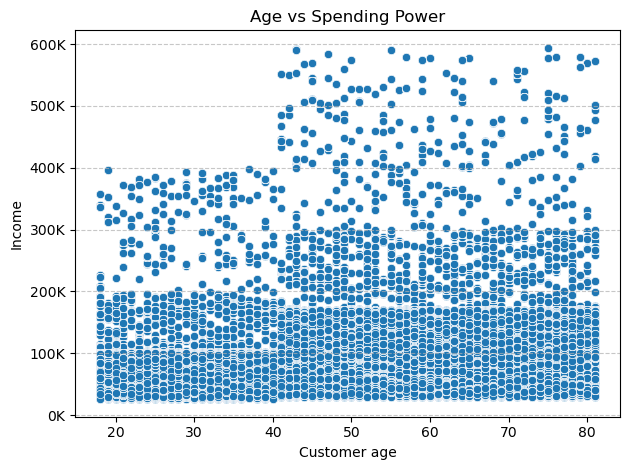

In [113]:
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

# Add title and labels
plt.title("Age vs Spending Power")
plt.xlabel("Customer age")
plt.ylabel("Income")

# Changing y-axis to display values in thousands
scatterplot.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))

# Show the plot
plt.show()

Ages 20-40 have less spending power than those over the age of 40. Majority of customers, regardless of age, have on income of less than $200,000.